In [1]:
import yfinance as yf
from numerapi import CryptoAPI
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import cvxpy as cp

api = CryptoAPI()
api.download_dataset(
	"crypto/v1.0/historical_meta_models.csv",
	"historical_meta_models.csv"
)

#load historical MM
mm = pd.read_csv('historical_meta_models.csv')
mm['date'] = pd.to_datetime( mm['date'] )

2024-11-07 13:40:42,802 INFO numerapi.utils: target file already exists
2024-11-07 13:40:42,803 INFO numerapi.utils: starting download
historical_meta_models.csv: 2.87MB [00:00, 7.21MB/s]                            


In [2]:
# get historical daily data for all tickers available in historical MM

all_data = []
for symbol in mm['symbol'].unique():
    print( symbol )
    data = yf.Ticker(f"{symbol}-USD")
    # first_date = datetime.datetime.utcfromtimestamp(data.info['firstTradeDateEpochUtc']).strftime('%Y-%m-%d')
    try:
        hist = data.history(
            # start=first_date, 
            start='2021-01-01',
            end=datetime.date.today().strftime('%Y-%m-%d'), 
            interval="1d"
        )
        hist['symbol'] = symbol

        #some of the data looks a little flaky, with large jumps. THis line gets rid of price streams with HUGE abs returns
        if np.abs( np.log( hist['Close'] ).diff() ).max() > 5:
            print('filter bad data ', symbol)
            continue
        if hist.iloc[-1].name.strftime('%Y-%m-%d') == ( datetime.date.today() - datetime.timedelta(days=1) ).strftime('%Y-%m-%d'):
            all_data.append( hist )
    except:
        continue

df = pd.concat( all_data )
df['date'] = pd.to_datetime( df.index.strftime('%Y-%m-%d') )
df.set_index('date')
df = df.sort_index()

BTC
ETH
BNB
SOL
XRP
DOGE
TON
ADA
SHIB
filter bad data  SHIB
AVAX


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TRX
DOT
BCH
LINK
NEAR
LTC
ICP
LEO
UNI
filter bad data  UNI
RNDR
ETC
HBAR
APT
ATOM
CRO
PEPE
FIL
IMX
XLM
STX


2024-11-07 13:40:46,591 ERROR yfinance: TAO-USD: Period '1mo' is invalid, must be one of ['1d', '5d']


OKB
TAO
OP
filter bad data  OP
ARB
filter bad data  ARB
GRT
KAS
MKR
VET
SUI
AR
XMR
INJ
THETA
FET
FTM
LDO
FLOKI


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  FLOKI
CORE
filter bad data  CORE
BGB
ALGO
BONK
filter bad data  BONK
GALA


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


FLOW
AAVE
BSV
WLD
filter bad data  WLD
BEAM
vBNB
QNT
CHZ
FLR
NEO
AKT
EGLD
KCS
DYDX
XEC
MINA
JASMY
RON
AIOZ
SNX


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


CFX
CHEEL
GNO
HNT
AXL
CKB
GT
APE
filter bad data  APE
NEXO
TFUEL
RBN
PRIME
ROSE
BTG
BLUR
WEMIX
FTN
OM
OSMO
GLM
XAUt
FTT
WOO
ASTR
XDC
LPT
IOTX
MX
DEXE
NFT
filter bad data  NFT
SUPER


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TWT
ANKR
XRD
ENS
RAY
1INCH
PAXG
ZETA
filter bad data  ZETA
SSV
GMT
GAL
RPL
RVN
SC
ENJ
SKL
ELF
ID
ETHW
SFP
BNX
TRAC
ILV
T
CFG
DCR
POLYX
XCH
CSPR
GAS
ANT
RSR
FXS
BICO
FLUX
YGG
JST
MASK
AMP
TEL
0x0
ABT
VENOM
ONT
TRB
WAVES
BORG
PRO
BabyDoge
AZERO


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


VTHO
POKT
SUSHI
VANRY
KSM
LSK
CTC
AGI
GMX
CVX
YFI
RLC
CHR
ONG
LCX
C98
ACH
DGB
BDX
HIGH
BAL
CELR
ATOR
RSS3
FNSA
IOST
WILD
DESO
IQ
COTI
MOBILE
PROM
POWR
RIF
POND
VELO
CVC
XNO
PUNDIX
STRAX
SYN
SFUND
HIVE
BLZ
ZCX
EDU
ALEX
WMT
XVS
SYS
NOIA
NAKA
ZIG
ARK
ORAI
MVL
SUN
PHA
DUSK
Gomining
BONE
CEL
ZEN
TRU
STEEM
DAO
CQT
NYM
PYR
OAS
REQ
HFT
filter bad data  HFT
HONEY
MOVR


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TET
CGPT
MLK
GFI
FRONT
DKA
MYRIA
filter bad data  MYRIA
ORCA
DAG
TLOS
ERN
MTL
APEX
ORBS
PHB
AITECH
LEVER
SDEX
GNS
DIONE
FORT
XYO
DODO
BFIC
AUCTION
ARDR
MBOX
LYX
PNG
GHST
ELON


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  ELON
LQTY
HT
LOOM
HIFI
LON
MAV
ALEPH
CUDOS
MBX
ALPHA
BNT
ERG
NKN
CTK
ATA
BFC
EWT
GHX
XVG
CREAM
LOOKS
OGN
MAPO
RARE
filter bad data  RARE
BADGER
TRIAS
LTO
UQC
QKC
CTXC
XPLA
ACS
RARI
REI
AGLD
STIK
MPLX
NULS
POLS
META
BOSON
LMWR
ALI
PERP
AIDOGE
DMTR


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


CBK
GODS
WXT
ETN
CPOOL
CRE
VAI
UOS
MPL
FORTH
ATLAS
XCHNG
DNT
MDX
REN
LAT
TOMI
MLN
BRISE


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  BRISE
BETA
FUN
SWEAT
FIS
TRADE
AERGO
NUM
XCN
CLV
DIA
RLY
DIMO
VRA
STRX
COS
FARM
NPT
VIC
filter bad data  VIC
FLM
WAN
HUNT
IDEX
STRK
DFI
BEL
KMD
GFAL
DNX
ATR
ASM
TT
AOG
COMBO
DEGO
TURBO
FCT
XCAD
GRS
ORN
OPUL
SOLO
MATH
CERE
LOKA
QUACK


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


PDA
QUICK
UPP
IRIS
LEASH
COVAL
VRTX
MOC
ROUTE
10SET
DEP
UTK
LIME
EL
VLX
LMR
AHT
CRTS
AQT
CAT
CCD
BSW
MXC
TAVA
PSG
ACX
HOPR
NCT
AVA
DCB
ONIT
ASD
AKRO
BIFI
PIT
HAI


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


UNFI
UFT
SNS
GLQ
PRQ
KP3R
AMPL
FAR
ALU
XPR
ADX
KRL
SAMO
WIFI
BST
LIKE
BAR
AMB
SUKU
KLV
VIDT
CREO
FIRO
ZERC
ALPACA
VITE
WING
HARD
SCLP
AST
LAZIO
OPEN
BOND
HELLO
ICHI
SPA
VOLT
ARG
CITY
WAGMIGAMES
CELL
UFO
QORPO
SLIM
NODL
OG
CREDI
KLIMA
BZZ
TROY
QRL
SQUIDGROW
DBC
ALPINE


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


POLA
OLE
CSIX
VIB
COT
filter bad data  COT
SD
filter bad data  SD
SWFTC
LING
CATGIRL
PORTO
DF


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


VGX
DCK
GFT
CVTX
OVR
MMIT
filter bad data  MMIT
YFII
FITFI


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


BBF
ABBC
UBXS
OAX
POOLX
SWAP
SHIDO
filter bad data  SHIDO
KASTA


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


DVI
TPY
JUV
DC
BIOT
LM
CULT


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  CULT
ATM
CATCH
filter bad data  CATCH
HAPI
ACM
CRU
EPX
AREA
ARIX
MATIC
RUNE
BTT


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  BTT
PENDLE
XTZ
METIS
UMA
RLB
API3
MAGIC


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  MAGIC
ALPH
GOG
ZENT
AURORA
ACA
filter bad data  ACA
VR
GEAR
SIDUS
BOBA
POLIS
SDAO
MDT
GST
AL
VOXEL
TARA
COREUM
KEY
FOX
KISHU


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KATA
PSTAKE
SANTOS
AURY
CWIF
filter bad data  CWIF
INV


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


PNK
SIS
VINU


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  VINU
ML
ORDI
PEOPLE
SURE
NXRA
MBL
TKO
ELA
AGRS
SHX
STARL
NTX
FIO
BLOK
CAPS
HERO
ZYN
KUJI
filter bad data  KUJI
KEEP
STPT
LADYS


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MED
QI
ALCX
RBX
CETUS
PSP
EOS
LUNC
filter bad data  LUNC
HOT
filter bad data  HOT
QTUM
BORA
WIN
SCRT
ARPA
HPO
OCTA
BOTTO


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


APX
CRV
ONE
NMR
BITCOIN


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
2024-11-07 13:41:46,132 ERROR yfinance: STG-USD: Period '1mo' is invalid, must be one of ['1d', '5d']


STG
GAFI
DATA
SHDW
SNEK
XPRT
IAG
COPI
OPTI
RWA
DFL
KDA
GF
filter bad data  GF
AURA
filter bad data  AURA
PAID
VEGA
CHESS
MOON
TIME
TOWER


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TSUKA
KLAY
ZRX
CELO
COMP
filter bad data  COMP
ZEC
JOE


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


RDNT
RAD
GTC
BAKE
CEEK
PIVX
SLG
AXS
KAVA
IOTA
CAKE
LUNA
filter bad data  LUNA
BAT
DASH
XEM
TRIBE
GLMR
BAND
CTSI
SNT
HOOK
OXT
SPELL
DAR
WRX
STMX
TLM
GEL
FIDA
LRC
RBTC
PROPC
DEXT
VVS
BMX
RACA
SOV
LIT
HGPT
sAVAX
AUDIO
SLP
JITOSOL
SAND
KNC
OMG
ALICE
DORA
filter bad data  DORA
FX
WSTETH
STORJ
DENT
EVER
LINA
REEF
MNTC
STC
MVC


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  MVC
WETH
SWETH
SAFE
XYM
CROWN
WAXP
WAVAX
EUL
WMATIC
PCI
SIX
DOCK
BURGER
BTM
$MONG


2024-11-07 13:41:57,212 ERROR yfinance: $$MONG-USD: possibly delisted; no timezone found


QTCON
WALLET
AKITA
filter bad data  AKITA
GMEE
AMO


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


GRND
MIX
INF
filter bad data  INF
METFI
DPI
MANA
ZIL
ICX
CLORE
SXP
TBTC
NOS
CET
SFRXETH
PEPECOIN
FLZ
NTRN
ISIKC
STT
vETH
LOCUS
LISTA
PAAL
MCOIN
SAUCE
GEOD
TAI
BLOCK
BOB
PMG
H2O
MTRG
CTX
PTS
LOVELY
filter bad data  LOVELY
ROG
BOBO


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  BOBO
SRX
SHPING
PEPE2.0


2024-11-07 13:42:02,582 ERROR yfinance: $PEPE2.0-USD: possibly delisted; no timezone found


MONA
SMT
MNT
ARKM
BTRST
MOB
ARRR
MNW
TPT
RENDER


2024-11-07 13:42:03,497 ERROR yfinance: RENDER-USD: Period '1mo' is invalid, must be one of ['1d', '5d']
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


NEON
MOG
filter bad data  MOG
ZANO


2024-11-07 13:42:03,901 ERROR yfinance: A8-USD: Period '1mo' is invalid, must be one of ['1d', '5d']


CAH
A8
ZKL
filter bad data  ZKL
OGY
SABAI
KUB
STOS
ASR
OOKI
AGLA
CVP
CXT
filter bad data  CXT
TOSHI
FOR


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


SRM
NYAN
filter bad data  NYAN
ARTY
MCADE
DEL
PIB
BAD
UNIBOT


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  UNIBOT
REVV
RIO
ZKB
filter bad data  ZKB
NWC
INTER


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


SOLVE
FUSE
NRG
SQR
XDEFI
AIPAD
BITCI
MV
CHO
ORB
filter bad data  ORB
3ULL


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


PLANET
ROA
BRWL
ZBU
PAW
filter bad data  PAW
EVZ


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


TEMCO
XDB
SGT
BKN
OBSR
RITE
AZIT
SAKAI
MOCHI
TRA
PZP
SWCH
SEI
DUST
filter bad data  DUST
CYBER
KSP
GENE
APM
PACE
TRUMP
MAN
HTM
PROS
WIKEN
AVT
KOIN
filter bad data  KOIN
AFC
filter bad data  AFC
SERO
ADP
EGG
POOH


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


BRICK
MEV
CHEQ
GLEEC
JETTON
CRP
bPRIVA
GSWIFT
LAND
WITCH
SOFI
SOUL
VIX
BTR
WOM
CPR
DOME
OMAX
BRN
MEE
OSAK
NPC
filter bad data  NPC
BLY


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


HAM
ADM


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


NAP
LBL
BTS
MUSE
RXD
GOAL
MAF
KWENTA
LWA
CHEX
SPX


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AA
eUSD
BANANA
M87
filter bad data  M87
MBS


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


filter bad data  MBS
FT
TAROT
CATE


2024-11-07 13:42:15,329 ERROR yfinance: SQGROW-USD: Period '1mo' is invalid, must be one of ['1d', '5d']


SQGROW
HI
PXT
JESUS
ADS
OMNOM


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


SMURFCAT
OMIKAMI
SKEY
HEART
THE
BREED
KIBSHI
filter bad data  KIBSHI
HYPC


/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AVI
filter bad data  AVI
COOK
filter bad data  COOK
PLU


2024-11-07 13:42:16,820 ERROR yfinance: WMTX-USD: Period '1mo' is invalid, must be one of ['1d', '5d']


WMTX
RISE
KYVE
STFX
MEME
CGO
HTR
PSPS
VARA


In [3]:
# only keep weekday prices
df = df.loc[ df.index.weekday <= 4 ]

# compute future/past 1 and 20 day log returns
lag_days = 20
df['lr'] = df.groupby('symbol')['Close'].transform(
    lambda y: np.log(y).diff() .shift(-1)
)
df['lr_20'] = df.groupby('symbol')['Close'].transform(
    lambda y: np.log(y).diff(lag_days).shift(-lag_days)
)
df['past_lr_20'] = df.groupby('symbol')['Close'].transform(
    lambda y: np.log(y).diff(lag_days)
)

/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jefferythewind/anaconda3/envs/ml310/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,date,lr,lr_20,past_lr_20
Date,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,0.0,0.0,BTC,2021-01-01,0.084743,0.155508,NaN
2021-01-01 00:00:00+00:00,0.041602,0.045112,0.041375,0.042181,3357315,0.0,0.0,ROSE,2021-01-01,-0.020768,0.286253,NaN
2021-01-01 00:00:00+00:00,0.019282,0.020887,0.017806,0.018963,100329,0.0,0.0,SLP,2021-01-01,-0.096534,-0.252468,NaN
2021-01-01 00:00:00+00:00,8.409172,8.662134,8.368423,8.498152,6954399,0.0,0.0,BTG,2021-01-01,0.046902,0.246368,NaN
2021-01-01 00:00:00+00:00,0.153076,0.160752,0.152448,0.160041,773859,0.0,0.0,AUDIO,2021-01-01,-0.051083,0.265702,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06 00:00:00+00:00,0.045795,0.045795,0.040536,0.044995,157014,0.0,0.0,AREA,2024-11-06,NaN,NaN,0.003562
2024-11-06 00:00:00+00:00,0.011765,0.011776,0.011723,0.011733,182091,0.0,0.0,CUDOS,2024-11-06,NaN,NaN,0.031603
2024-11-06 00:00:00+00:00,0.068951,0.075691,0.068951,0.074786,2392806,0.0,0.0,GHX,2024-11-06,NaN,NaN,-0.141053


In [5]:
#join metamodel predictions with log returns and initialize portfolio weight vector

x = df.set_index(['symbol','date']).join( mm.set_index(['symbol','date']), how='outer' )
x['w'] = 0
n_factors = 3
factor_columns = [f'market_beta_{i}' for i in range(n_factors) ]
x[factor_columns] = np.nan

In [6]:
#statistical risk modeling
#step through each date and fit an SVD to historical returns, extracting the betas to the factors


# Assuming 'x' has MultiIndex (symbol, date)
portfolio_dates = sorted(x.loc[~x['meta_model'].isna()].index.get_level_values(1).unique())#[-15:]
prev_factor_returns = None
# Loop through each portfolio date
for d in portfolio_dates:
    print(f"Processing date: {d}")
    
    # Step 1: Filter to get all data earlier than date 'd'
    past_data = x.loc[( x.index.get_level_values(1) < d ) & ( np.abs( x.past_lr_20 ) < 5 )]
    
    # Step 4: Pivot to create a DataFrame with dates as rows, symbols as columns, and 'lr' as values
    returns_matrix = past_data['past_lr_20'].unstack(level=0).sort_index()

    r = returns_matrix.iloc[20:].iloc[-600:].dropna(axis=1)
    r = r.loc[:, ~np.isinf(r).any()]
    sr = r.copy()#
    # sr = pd.DataFrame( columns = list(r), data = StandardScaler().fit_transform(r) ) #optionally scale returns?
    
    svd = TruncatedSVD(n_components=n_factors)  # Only the largest component
    svd.fit(sr)
    
    # Step 2: The first column of V^T contains the betas for each symbol
    # In TruncatedSVD, `components_` gives us V^T, so we extract the first row (biggest factor)
    betas = svd.components_#*svd.singular_values_[0]
    print(betas.shape)

    # Get the z-score normalized returns of BTC (assuming BTC is one of the columns in r)
    mean_returns = sr.mean(axis=1)
    factor_returns = svd.transform( sr ).copy()

    if prev_factor_returns is not None:
        for i in range( n_factors ):
            # Check correlation with BTC's normalized returns
            correlation_with_prev = np.corrcoef(factor_returns[:-1,i].flatten(), prev_factor_returns[1:,i].flatten())[0, 1]
            print(correlation_with_prev)
            
            if correlation_with_prev < 0:
                betas[i,:] *= -1
                factor_returns[:,i] *= -1
    else:
        #align first factor with mean return
        correlation_with_mean = np.corrcoef(factor_returns[:,0].flatten(), mean_returns.values.flatten())[0, 1]
        if correlation_with_mean < 0:
            betas[0,:] *= -1
            factor_returns[:,0] *= -1
                
    prev_factor_returns = factor_returns.copy()
  
    # scaling_factor = np.abs(mean_returns).mean() / np.abs(factor_returns[:,0]).mean()
    # betas /= scaling_factor
    
    for i, sym in enumerate( sr.columns ):
        x.loc[(sym, d), factor_columns] = betas[:,i]
        if sym == 'BTC':
            print('BTC beta ', betas[:,i])
            # plt.plot(factor_returns)
            # plt.show()
    


Processing date: 2024-05-07 00:00:00
(3, 543)
BTC beta  [ 0.02629397 -0.01088798  0.00345213]
Processing date: 2024-05-08 00:00:00
(3, 544)
-0.9999953511239694
0.9992946246082238
0.9998740236763431
BTC beta  [ 0.02622956 -0.01102165  0.00343761]
Processing date: 2024-05-09 00:00:00
(3, 546)
-0.999984691381892
0.9995650428792708
0.9996421125882703
BTC beta  [ 0.02609971 -0.01078865  0.00389452]
Processing date: 2024-05-10 00:00:00
(3, 546)
-0.9999998281911279
0.9999292548021255
0.9999518340638288
BTC beta  [ 0.02606445 -0.01060024  0.00391067]
Processing date: 2024-05-13 00:00:00
(3, 547)
-0.9999871985067302
0.9999201192599945
0.9996159122918817
BTC beta  [ 0.0259755  -0.01065843  0.004232  ]
Processing date: 2024-05-14 00:00:00
(3, 548)
-0.9999985884489454
0.9999756964082819
0.9999258327056714
BTC beta  [ 0.02596032 -0.01067257  0.00382601]
Processing date: 2024-05-15 00:00:00
(3, 549)
-0.9999897239948891
0.9957848096737276
0.9999610862441292
BTC beta  [ 0.02596244 -0.00925661  0.00389

In [7]:
#forward fill missing values
x['Close'] = x.groupby('symbol')['Close'].ffill()
x[factor_columns] = x.groupby('symbol')[factor_columns].ffill()

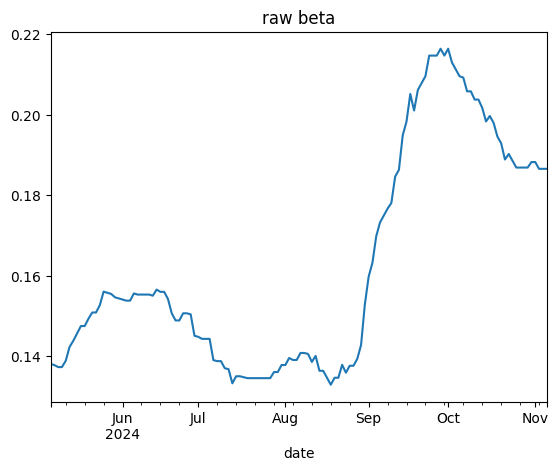

<Axes: title={'center': 'beta rank'}, xlabel='date'>

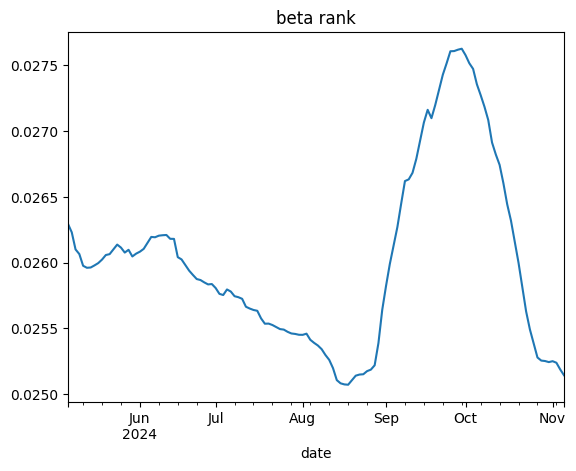

In [8]:
#show BTC beta and beta rank over the simulation period

x['beta_rank'] = x.groupby('date')['market_beta_0'].rank(pct=True)
x.loc[('BTC'), 'beta_rank'].dropna().plot(title='raw beta')
plt.show()

x.loc[('BTC'), 'market_beta_0'].dropna().plot(title='beta rank')

In [9]:
# Take a look at the last date of betas
betas_df = pd.DataFrame(betas[0,:], index=r.columns, columns=['beta']).sort_values('beta')
betas_df['rank'] = range(len(betas_df))
betas_df#.loc['BTC']

,beta,rank
symbol,,
ARIX,-0.016534,0
DEL,-0.010439,1
ZYN,-0.009752,2
ISIKC,-0.007403,3
OPEN,-0.005533,4
...,...,...
NOS,0.085240,589
DMTR,0.087796,590
GLQ,0.090393,591


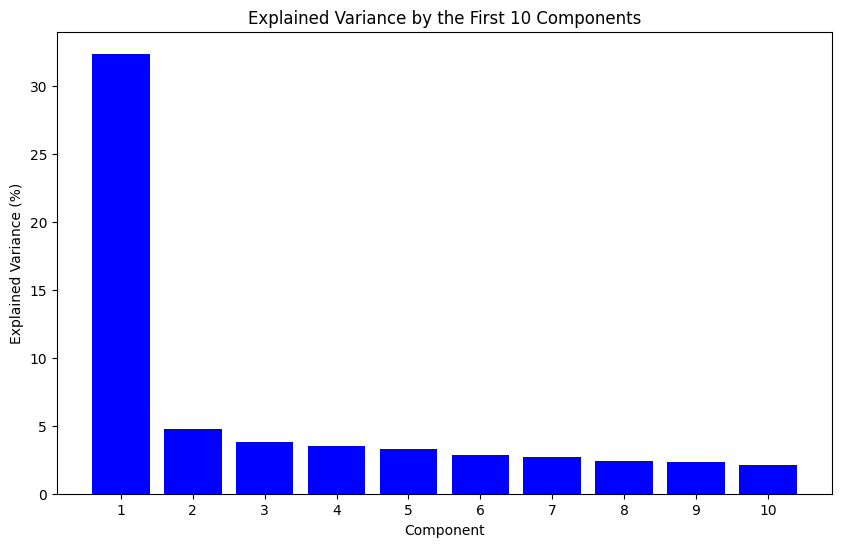

In [10]:


# Fit SVD on the returns matrix 'sr' and get multiple components to calculate explained variance
n_components = 10  # Choose the number of components to analyze
svd = TruncatedSVD(n_components=sr.shape[1])
svd.fit(sr)

# Compute total variance (sum of squared singular values)
total_variance = np.sum(svd.singular_values_ ** 2)

# Calculate explained variance for each of the first n components
explained_variances = [(sv ** 2) / total_variance * 100 for sv in svd.singular_values_[:n_components]]

# Plot the explained variance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variances, color='blue')
plt.xlabel("Component")
plt.ylabel("Explained Variance (%)")
plt.title(f"Explained Variance by the First {n_components} Components")
plt.xticks(range(1, n_components + 1))
plt.show()

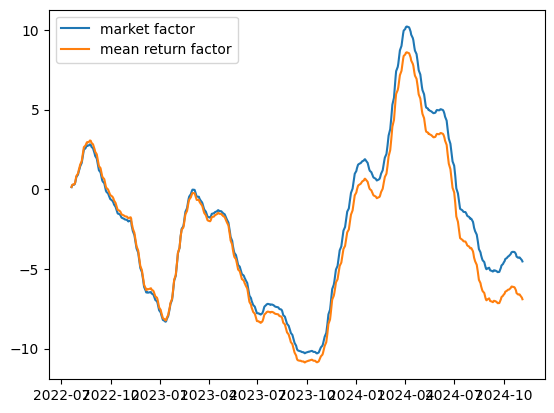

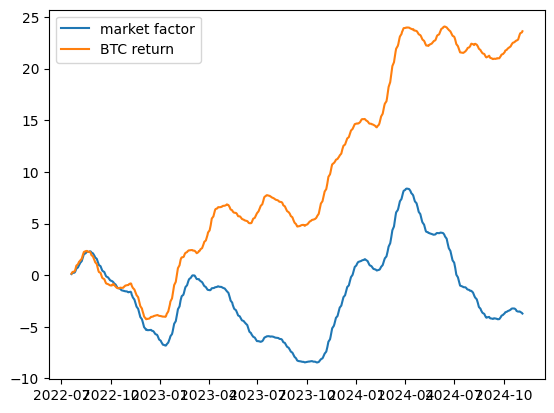

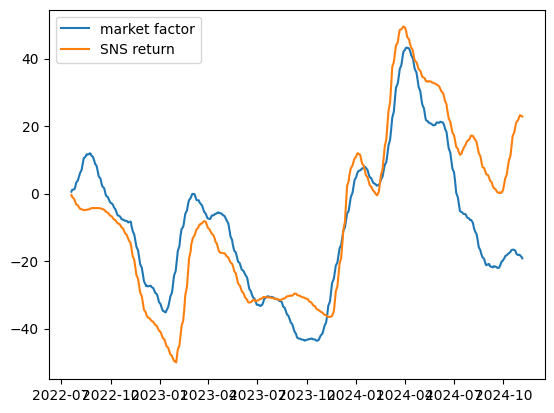

In [88]:
#plot the first component market factor returns against the mean return of the universe (very similar)

market_factor = factor_returns[:,0]
market_factor *= np.abs( sr.mean(axis=1) ).mean() / np.abs( factor_returns[:,0] ).mean()

plt.plot( sr.index, factor_returns[:,0].cumsum(), label='market factor' )
plt.plot( sr.mean(axis=1).cumsum(), label='mean return factor'  )

plt.legend()
plt.show()

#plot BTC returns against market factor 1 (BTC doesn't have highest beta)
comparison_ticker = 'BTC'

market_factor = factor_returns[:,0]
market_factor *= np.abs( sr[comparison_ticker] ).mean() / np.abs( factor_returns[:,0] ).mean()

plt.plot( sr.index, factor_returns[:,0].cumsum(), label='market factor' )
plt.plot( sr[comparison_ticker].cumsum(), label=f'{comparison_ticker} return' )
plt.legend()
plt.show()

#plot highest beta returns against market factor (should be most similar in universe)
comparison_ticker = 'SNS'

market_factor = factor_returns[:,0]
market_factor *= np.abs( sr[comparison_ticker] ).mean() / np.abs( factor_returns[:,0] ).mean()

plt.plot( sr.index, factor_returns[:,0].cumsum(), label='market factor' )
plt.plot( sr[comparison_ticker].cumsum(), label=f'{comparison_ticker} return' )
plt.legend()
plt.show()

In [20]:
#create (optimized) portfolio vectors for each day.
#compute TB10 portfolio as well.

# Sort by date and meta_model, then assign weights based on the top and bottom ranks within each date group
# y = x.dropna(subset=['lr','meta_model'] + factor_columns)
y = x.loc[ x.index.get_level_values(1).isin( portfolio_dates ) ].copy()
y = y.sort_values(by=['date', 'meta_model'], ascending=False)

def assign_top_bottom_w(group):
    
    # Initialize all weights to 0
    group['w'] = 0.0
    group['w_TB100'] = 0.0

    good_index = group.dropna(subset=['meta_model']+factor_columns).index
    B = group.loc[ good_index, factor_columns].values
    a = group.loc[ good_index, 'meta_model'].values - 0.5
    

    n = B.shape[0]

    # Define the optimization variable
    w = cp.Variable(n)
    
    # Define auxiliary variables to handle the absolute sum constraint
    w_abs = cp.Variable(n)
    
    # Define the constraints
    constraints = [
        cp.sum(w_abs) == 1,        # sum of absolute values of w equals 1
        w_abs >= w,                # w_abs bounds w from below
        w_abs >= -w,               # w_abs bounds w from above
        w >= -.1,                   # w in [-1, 1]
        w <= .1,
        B.T @ w == 0               # w is in the null space of B
    ]
    
    # Define the objective function
    objective = cp.Maximize(w @ a)
    
    # Set up the problem and solve it
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    # Display the results
    print("Objective value:", problem.value)

    group.loc[ good_index, 'w' ] = w.value

    beta_exposures = np.dot(B.T, w.value)
    print(f"Portfolio Beta Exposures (should be close to zero): {beta_exposures}")

    group['w'] = (1/lag_days) * group['w'] / np.sum( np.abs( group['w'] ) )

    # group['w'].plot()
    # plt.show()

    group.loc[ good_index[:100], 'w_TB100'] = 1
    group.loc[ good_index[-100:], 'w_TB100'] = -1

    group['w_TB100'] = (1/lag_days) * group['w_TB100'] / np.sum( np.abs( group['w_TB100'] ) )

    # group['w_TB10'].plot()
    # plt.show()
    return group

# Apply the function by date group
y = y.groupby('date', group_keys=False).apply(assign_top_bottom_w)

Objective value: 0.48715439797770216
Portfolio Beta Exposures (should be close to zero): [-4.12864187e-16  2.81892565e-15  5.30304967e-15]
Objective value: 0.4885815264557607
Portfolio Beta Exposures (should be close to zero): [2.08166817e-17 1.35308431e-16 4.21537805e-16]
Objective value: 0.490273994191893
Portfolio Beta Exposures (should be close to zero): [ 3.24128270e-17 -2.63347505e-17  3.30110450e-18]
Objective value: 0.4928764281242653
Portfolio Beta Exposures (should be close to zero): [7.67001643e-17 3.66316436e-15 1.55506182e-15]
Objective value: 0.4904592719408855
Portfolio Beta Exposures (should be close to zero): [-3.03162762e-17  6.11098188e-17 -1.76368374e-17]
Objective value: 0.4891113357843315
Portfolio Beta Exposures (should be close to zero): [ 1.90819582e-17 -7.97972799e-17  0.00000000e+00]
Objective value: 0.4880145946733573
Portfolio Beta Exposures (should be close to zero): [-4.33735041e-17 -1.01838379e-15  1.82000167e-15]
Objective value: 0.4903737792732248
Port

In [21]:
#function to get portfolio weight given positions

def get_portfolio_weight_vector( portfolio ):
    portfolio_weight_vector = {}
    for pos in portfolio['positions']:
        if pos['symbol'] in portfolio_weight_vector:
            portfolio_weight_vector[pos['symbol']] += pos['shares'] * pos['last_price']
        else:
            portfolio_weight_vector[pos['symbol']] = pos['shares'] * pos['last_price']
    return pd.DataFrame( portfolio_weight_vector, index=['portfolio_weight'] ).T

In [90]:
#function to get adjusted risk neutral portfolio

def get_risk_neutral_portoflio( p_weight, this_chunk, factor_columns ):
    risk_df = p_weight.join( this_chunk.set_index( this_chunk.index.get_level_values(0) )[factor_columns], how='left' )
    # risk_df['portfolio_weight'] = risk_df['portfolio_weight'] / np.abs( risk_df['portfolio_weight'] ).sum()
    B = risk_df[factor_columns].values
    w_naive = risk_df['portfolio_weight'].values
    
    naive_beta_exposures = np.dot(B.T, w_naive)
    print(f"Naive Portfolio Beta Exposures: {naive_beta_exposures}")

    B_pseudo_inverse = np.linalg.inv(B.T @ B) @ B.T
    w_adjusted = w_naive - B @ B_pseudo_inverse @ w_naive
    
    adjusted_beta_exposures = np.dot(B.T, w_adjusted)
    print(f"Adjusted Portfolio Beta Exposures (should be close to zero): {adjusted_beta_exposures}")

    # if np.abs( w_adjusted ).sum() > 1.0:
    # risk_df['w_neutral'] = np.sum(w_naive) * w_adjusted / np.abs( w_adjusted ).sum()
    # else:
    risk_df['w_neutral'] = w_adjusted
    return risk_df ,naive_beta_exposures

In [109]:
#backtesting simulation

portfolio = { 
    'cash': 1.0,
    'positions': []
}
target_portfolio = 'w_TB100'

portfolio_stats = {
    'value':{},
    'leverage':{},
    'net_alpha':{},
    'cash':{},
    'portfolio':{},
    'risk_exposures':{}
}

apply_neutralization = True

for di, d in enumerate( portfolio_dates ):
    print(d)
    this_chunk = y.loc[ ( y.index.get_level_values(1) == d ) ]

    #close out closing positions
    positions_to_remove = []
    transaction_amount = 0
    for position in portfolio['positions']:
        last_price = this_chunk.loc[position['symbol'], 'Close'].values[0]
        if np.isnan( last_price ):
            continue
        position['last_price'] = last_price

        if position['exit_date']:
            if position['exit_date'] <= d:
                portfolio['cash'] += position['shares'] * last_price
                transaction_amount += np.abs( position['shares'] * last_price )
                positions_to_remove.append( position )
            
    for position in positions_to_remove:
        portfolio['positions'].remove( position )

    net_liq = portfolio['cash'] + np.sum( [ pos['shares'] * pos['last_price'] for pos in portfolio['positions'] ] )
    if np.isnan(net_liq):
        break

    
    #add new positions
    for idx, row in this_chunk.iterrows():
        if np.abs( row[target_portfolio] ) > 0 and ~np.isnan( row['Close'] ):
            portfolio['positions'].append( {
                'symbol': row.name[0],
                'shares': ( row[target_portfolio] * net_liq ) / row['Close'],
                'last_price': row['Close'],
                'entry_date': d,
                'exit_date': portfolio_dates[di + lag_days] if di + lag_days < len( portfolio_dates ) else None
            } )
            portfolio['cash'] -= ( row[target_portfolio] * net_liq )
            transaction_amount += np.abs( row[target_portfolio] * net_liq )

            if np.isnan( portfolio['positions'][-1]['shares'] ):
                print(portfolio['positions'][-1])
                raise Exception

    net_liq = float( portfolio['cash'] + np.sum( [ pos['shares'] * pos['last_price'] for pos in portfolio['positions'] ] ) )

    #risk neutralization
    #
    #
    p_weight = get_portfolio_weight_vector( portfolio )
    print( "p weight before",  np.abs( p_weight ).sum().values[0] )
    
    risk_df ,beta_exposures = get_risk_neutral_portoflio( p_weight, this_chunk, factor_columns )
    print( np.abs( risk_df['portfolio_weight'] ).sum(), np.abs( risk_df['w_neutral'] ).sum() )
    if apply_neutralization:
        
        for idx, row in risk_df.iterrows():
            if ~np.isnan( this_chunk.loc[ row.name, 'Close' ].values[0] ):
                target_pos = row['w_neutral']
            
                active_trades = [ item for item in portfolio['positions'] if item.get('symbol') == row.name ]
                active_pos = np.sum( [ pos['shares'] * pos['last_price'] for pos in active_trades ] )
                # print( "Active W, ", active_pos, "Target W: ", row['portfolio_weight'] )
                delta_pos = ( target_pos - active_pos )
    
                portfolio['positions'].append( {
                    'symbol': row.name,
                    'shares': delta_pos / this_chunk.loc[ row.name, 'Close' ].values[0],
                    'last_price': this_chunk.loc[ row.name, 'Close' ].values[0],
                    'entry_date': d,
                    'exit_date': portfolio_dates[di + 1] if di + 1 < len( portfolio_dates ) else None
                } )
                portfolio['cash'] -= delta_pos
                transaction_amount += np.abs( delta_pos )

                # print( "target weight,", row['w_neutral'] )
                # print( "ending weight, ", np.sum( [ pos['shares'] * pos['last_price'] for pos in active_trades ] )/ net_liq )
                if np.isnan( active_trades[0]['shares'] ):
                    print('BAD!!!')
                    print( delta_dollar_weight, this_chunk.loc[ row.name, 'Close' ].values[0] )
                    raise Exception
            else:
                print('skipped update')
        # plt.barh( risk_df.index, risk_df['portfolio_weight'] )
        # plt.barh( risk_df.index, risk_df['w_neutral'] )
        # plt.show()
    #End risk neutralization


    #show and record stats
    p_weight = get_portfolio_weight_vector( portfolio )
    print( "p weight after", np.abs( p_weight ).sum().values[0] )     
    
    
    print( 'net liq: ', net_liq )
    print( 'churn: ', transaction_amount )
    
    portfolio_stats['value'][d] = net_liq
    portfolio_stats['leverage'][d] = np.abs( p_weight ).sum().values[0]
    portfolio_stats['net_alpha'][d] = this_chunk['w'].fillna(0) @ ( this_chunk['meta_model'] - 0.5 ).fillna(0)
    portfolio_stats['cash'][d] = portfolio['cash'].copy()
    portfolio_stats['portfolio'][d] = p_weight.copy()
    risk_df ,beta_exposures = get_risk_neutral_portoflio( p_weight, this_chunk, factor_columns )
    portfolio_stats['risk_exposures'][d] = beta_exposures
    print('----')
    print('----')

    # if di == 30:
    #     break

2024-05-07 00:00:00
p weight before 0.05000000000000002
Naive Portfolio Beta Exposures: [-5.66789063e-05  5.69881560e-05 -1.52537823e-04]
Adjusted Portfolio Beta Exposures (should be close to zero): [ 8.30092288e-20  0.00000000e+00 -5.42101086e-20]
0.05000000000000002 0.0496425927575542
p weight after 0.0496425927575542
net liq:  1.0
churn:  0.05305739960009364
Naive Portfolio Beta Exposures: [ 8.30092288e-20  0.00000000e+00 -5.42101086e-20]
Adjusted Portfolio Beta Exposures (should be close to zero): [ 8.30092288e-20  2.71050543e-20 -1.35525272e-20]
----
----
2024-05-08 00:00:00
p weight before 0.09384769413626337
Naive Portfolio Beta Exposures: [-1.28045400e-04  6.98594052e-05 -5.49359544e-04]
Adjusted Portfolio Beta Exposures (should be close to zero): [-2.91379334e-19  6.77626358e-20 -1.69406589e-21]
0.09384769413626337 0.09216570460245209
p weight after 0.09216570460245209
net liq:  0.999634839296334
churn:  0.06334093352104288
Naive Portfolio Beta Exposures: [-2.91379334e-19  6.7

Portfolio Value    0.176818
dtype: float64

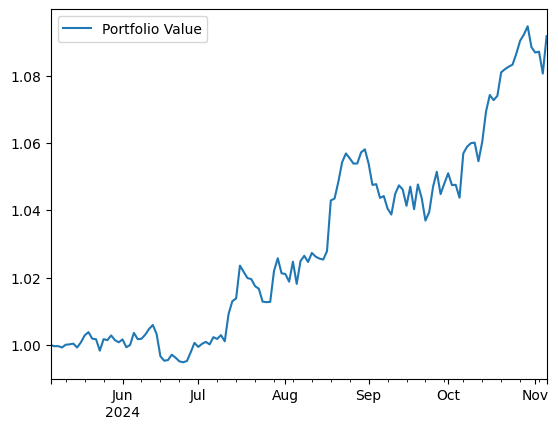

In [110]:
port_value = pd.DataFrame( portfolio_stats['value'], index=['Portfolio Value'] ).T
port_value.plot(title='')
port_value.diff().mean() / port_value.diff().std()

<Axes: title={'center': 'Churn in Cash'}>

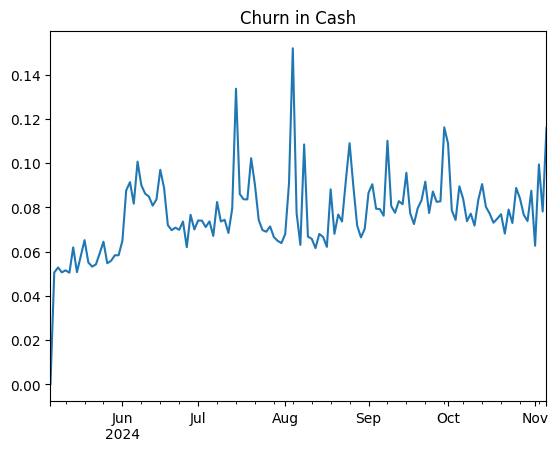

In [83]:
portfolio_table = pd.concat( portfolio_stats['portfolio'] ).unstack().fillna(0)
portfolio_table.diff().abs().sum(axis=1).plot(title='Churn in Cash')#/ portfolio_table.abs().sum(axis=1)

<Axes: title={'center': 'Churn as % of Portoflio'}>

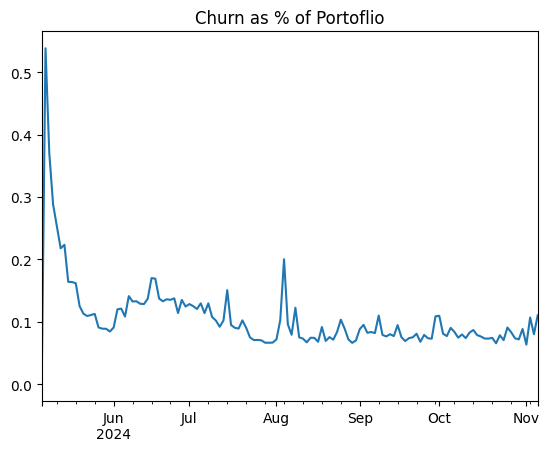

In [84]:
portfolio_table = pd.concat( portfolio_stats['portfolio'] ).unstack().fillna(0)
( portfolio_table.diff().abs().sum(axis=1)/ portfolio_table.abs().sum(axis=1) ).plot(title='Churn as % of Portoflio')

<Axes: >

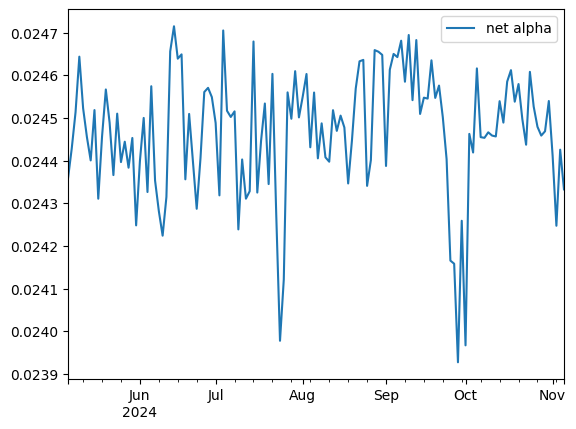

In [85]:
port_value = pd.DataFrame( portfolio_stats['net_alpha'], index=['net alpha'] ).T
port_value.plot()

<Axes: >

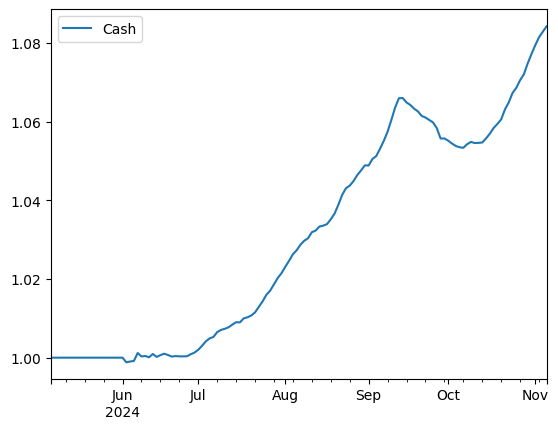

In [86]:
port_value = pd.DataFrame( portfolio_stats['cash'], index=['Cash'] ).T
port_value.plot()

<Axes: >

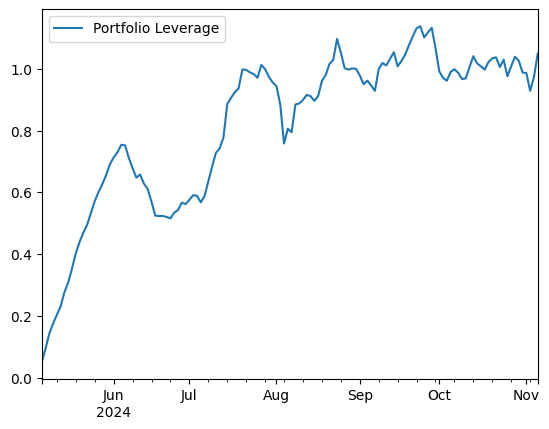

In [87]:
port_lev = pd.DataFrame( portfolio_stats['leverage'], index=['Portfolio Leverage'] ).T
port_lev.plot()

<Axes: >

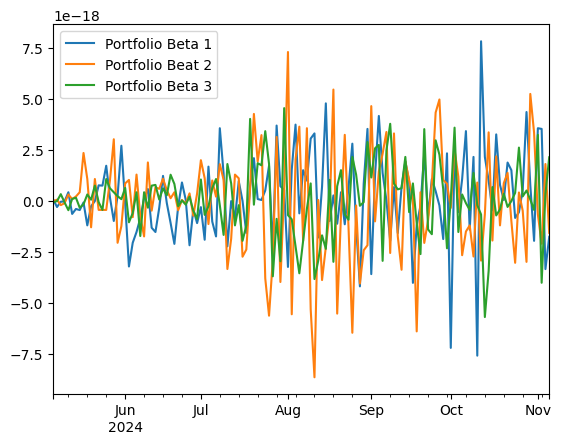

In [111]:
risk = pd.concat( [ pd.Series( portfolio_stats['risk_exposures'][key], name=key ) for key in portfolio_stats['risk_exposures'] ] , axis=1).T
risk.columns = ['Portfolio Beta 1', 'Portfolio Beat 2', 'Portfolio Beta 3']
risk.plot()

<Axes: xlabel='date'>

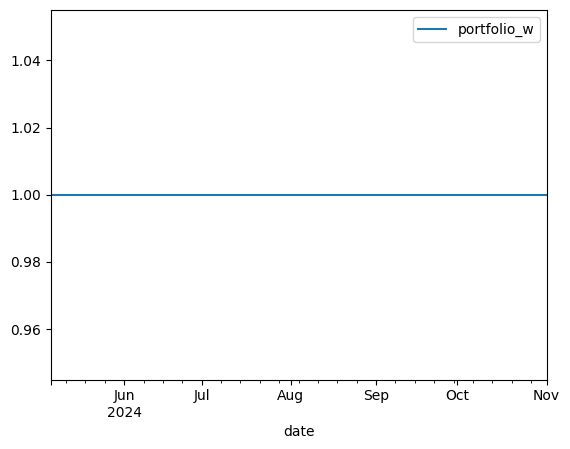

In [97]:
np.abs( y[['portfolio_w']] ).groupby('date').sum().plot()

<Axes: xlabel='date'>

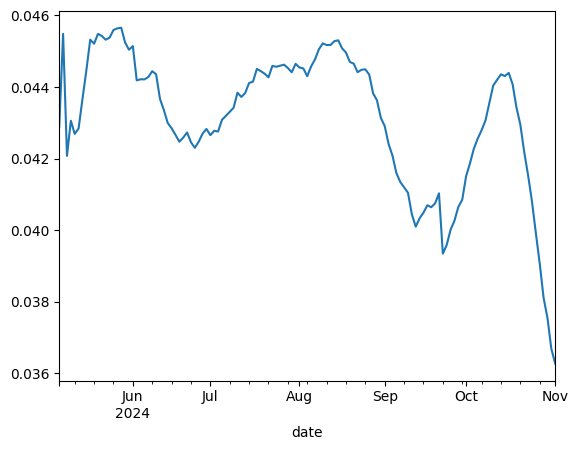

In [100]:
y.dropna(subset=['portfolio_w','market_beta_0'])[['portfolio_w','market_beta_0']].prod(axis=1).groupby('date').sum().plot()

-0.060784584798922445

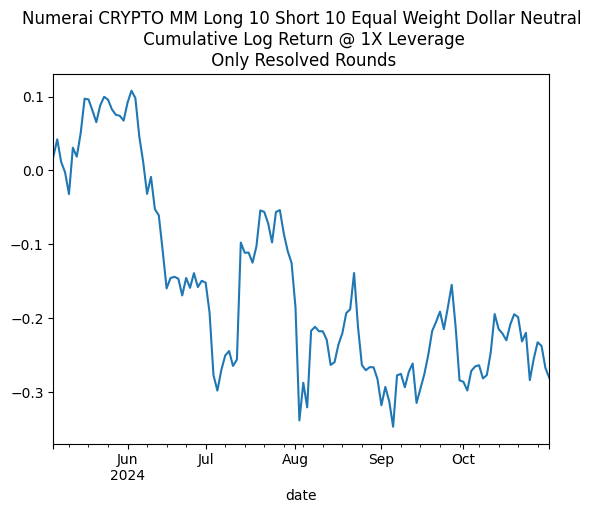

In [101]:
# view portoflio performance
portfolio_returns = y.dropna(subset=['lr','portfolio_w']).groupby('date').apply( lambda z: z['lr'] @ z['portfolio_w'] )
portfolio_returns.cumsum().plot(
    title='Numerai CRYPTO MM Long 10 Short 10 Equal Weight Dollar Neutral\n Cumulative Log Return @ 1X Leverage\n Only Resolved Rounds'
)
portfolio_returns.mean() / portfolio_returns.std()

1.3456904673434746

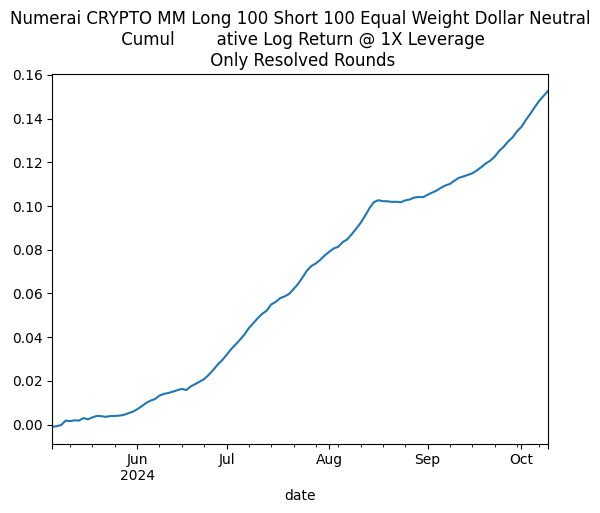

In [26]:
# view portoflio performance
portfolio_returns = y.dropna(subset=['lr_20','w_TB100']).groupby('date').apply( lambda z: z['lr_20'] @ z['w_TB100'] )
portfolio_returns.cumsum().plot(
    title='Numerai CRYPTO MM Long 100 Short 100 Equal Weight Dollar Neutral\n Cumul        ative Log Return @ 1X Leverage\n Only Resolved Rounds'
)
portfolio_returns.mean() / portfolio_returns.std()

1.0987126962707117

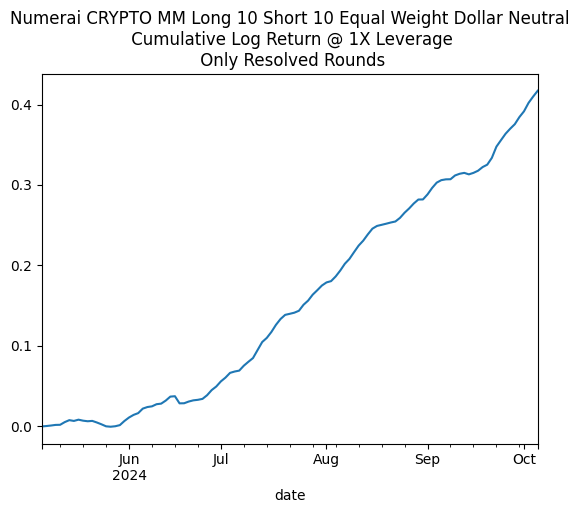

In [10]:
# view portoflio performance
portfolio_returns = y.dropna(subset=['lr_20','w']).groupby('date').apply( lambda z: z['lr_20'] @ z['w'] )
portfolio_returns.cumsum().plot(
    title='Numerai CRYPTO MM Long 10 Short 10 Equal Weight Dollar Neutral\n Cumulative Log Return @ 1X Leverage\n Only Resolved Rounds'
)
portfolio_returns.mean() / portfolio_returns.std()

In [7]:
x

,,Open,High,Low,Close,Volume,Dividends,Stock Splits,lr,past_lr,meta_model,market_beta,w
symbol,date,,,,,,,,,,,,
BNB,2024-11-01,576.034485,584.797180,568.164246,572.762268,1.708221e+09,0.0,0.0,NaN,0.030811,0.999,NaN,0.0025
XMR,2024-11-01,155.678757,159.559799,151.518768,156.460266,6.243000e+07,0.0,0.0,NaN,0.050257,0.997,NaN,0.0025
XRP,2024-11-01,0.509237,0.523351,0.504608,0.512868,1.284410e+09,0.0,0.0,NaN,-0.041016,0.995,NaN,0.0025
XLM,2024-11-01,0.092449,0.093609,0.090879,0.093088,5.153630e+07,0.0,0.0,NaN,0.013770,0.993,NaN,0.0025
ICX,2024-11-01,0.127776,0.131139,0.125181,0.126363,2.424982e+06,0.0,0.0,NaN,-0.061007,0.991,NaN,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEC,2021-01-01,63.979187,66.887955,54.944313,56.792831,7.125043e+08,0.0,0.0,0.413395,NaN,NaN,NaN,-0.0025
ZEN,2021-01-01,11.595818,14.498758,11.350686,11.791233,2.644505e+07,0.0,0.0,1.090778,NaN,NaN,NaN,-0.0025
ZIL,2021-01-01,0.082692,0.088733,0.078217,0.079075,3.372198e+08,0.0,0.0,-0.162679,NaN,NaN,NaN,-0.0025
